In [1]:
import os
import cv2
import numpy as np
from imutils import paths

In [2]:
from sklearn.preprocessing import LabelBinarizer

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
datapath = r"C:\Users\siddh\OneDrive\Desktop\Major Project\Keras\data"
outputmodel = r"C:\Users\siddh\OneDrive\Desktop\Major Project\Keras\model\outputmodel"
outputlabelbinarizer = r"C:\Users\siddh\OneDrive\Desktop\Major Project\Keras\model\outputmodelbinarizer"
epoch = 10

In [6]:
Sports_Labels = set(['NATURAL', 'GAMING','ANIMATION'])
print('Images is being loaded...')
pathToImages = list(paths.list_images(datapath))
data = []
labels = []

for images in pathToImages:
    label = images.split(os.path.sep)[-2]
    if label not in Sports_Labels:
        continue
    image = cv2.imread(images)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (244,244))
    data.append(image)
    labels.append(label)

Images is being loaded...


In [7]:
data = np.array(data)
labels = np.array(labels)
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [8]:
(X_train, X_test, Y_train, Y_test) = train_test_split(data, labels, test_size = 0.25, stratify = labels, random_state = 42)

In [9]:
traininAugmentation = ImageDataGenerator(
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,horizontal_flip=True,fill_mode="nearest")

validationAugmentation = ImageDataGenerator()
mean = np.array([123.68, 116.779, 103.939], dtype = "float32")
traininAugmentation.mean = mean
validationAugmentation.mean = mean

In [10]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras import layers
from tensorflow.keras.layers import Input
from keras.layers.pooling import AveragePooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

from tensorflow.keras.layers import Dropout
from tensorflow.keras import Model

In [11]:
baseModel = MobileNet(
    alpha=1.0,
    depth_multiplier=1,
    dropout=0.001,
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",input_shape=(224,224,3)
)

headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(7,7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(512, activation = "relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(len(lb.classes_), activation="softmax")(headModel)
model = Model(inputs=baseModel.input, outputs=headModel)

for basemodelLayers in baseModel.layers:
    basemodelLayers.trainable = False
#headModel.summary()

In [12]:
from tensorflow.keras.optimizers import Adam

In [13]:
opt = Adam(learning_rate = 0.0001)

In [14]:
model.compile(loss = "categorical_crossentropy",optimizer = opt, metrics = ["accuracy"])

In [15]:
History = model.fit_generator(
    traininAugmentation.flow(X_train,Y_train,batch_size=32),
    steps_per_epoch=len(X_train) // 32,
    validation_data=validationAugmentation.flow(X_test,Y_test),
    validation_steps = len(X_test) // 32,
    epochs = epoch)

D:\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
47/47 [==============================] - 64s 1s/step - loss: 0.7747 - accuracy: 0.6628 - val_loss: 0.3087 - val_accuracy: 0.8875
Epoch 2/10
47/47 [==============================] - 55s 1s/step - loss: 0.3845 - accuracy: 0.8510 - val_loss: 0.2498 - val_accuracy: 0.9146
Epoch 3/10
47/47 [==============================] - 53s 1s/step - loss: 0.2885 - accuracy: 0.8937 - val_loss: 0.2276 - val_accuracy: 0.9271
Epoch 4/10
47/47 [==============================] - 53s 1s/step - loss: 0.2606 - accuracy: 0.9072 - val_loss: 0.1969 - val_accuracy: 0.9250
Epoch 5/10
47/47 [==============================] - 52s 1s/step - loss: 0.2210 - accuracy: 0.9127 - val_loss: 0.1966 - val_accuracy: 0.9292
Epoch 6/10
47/47 [==============================] - 52s 1s/step - loss: 0.1969 - accuracy: 0.9282 - val_loss: 0.1855 - val_accuracy: 0.9375
Epoch 7/10
47/47 [==============================] - 53s 1s/step - loss: 0.1799 - accuracy: 0.9357 - val_loss: 0.1693 - val_accuracy: 0.9396
Epoch 8/10
47/47 [==

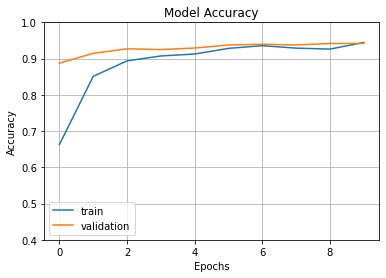

In [16]:
import matplotlib.pyplot as plt
fig1 = plt.gcf()
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [17]:
import pickle

In [18]:
model.save(outputmodel)
lbinarizer = open(r"C:\Users\siddh\OneDrive\Desktop\Major Project\Keras\model\outputmodelbinarizer.pickle","wb")
lbinarizer.write(pickle.dumps(lb))
lbinarizer.close()

INFO:tensorflow:Assets written to: C:\Users\siddh\OneDrive\Desktop\Major Project\Keras\model\outputmodel\assets
